##Driver Churn Prediction and Retention Optimization for Ola



---



Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

We are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like
*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [1]:
#downloading the dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

--2025-01-28 05:29:51--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.117, 18.164.173.18, 18.164.173.110, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.05s   

2025-01-28 05:29:52 (23.4 MB/s) - ‘ola_driver_scaler.csv’ saved [1127673/1127673]



In [2]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_csv('ola_driver_scaler.csv')

In [4]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


###Problem Defenition

Driver churn is a significant challenge in the ride-hailing industry, where companies like Ola rely heavily on a robust network of drivers to maintain service quality and operational efficiency. The high turnover rate among drivers poses substantial financial and operational hurdles, affecting customer satisfaction, driver morale, and overall business sustainability.

This study focuses on predicting driver churn based on a variety of driver attributes and operational data. By leveraging historical data from 2019 and 2020 for a segment of drivers, the goal is to build a predictive model to classify drivers into two categories: those likely to leave (churn) and those likely to stay. This will help Ola to:

*  Understand churn dynamics: Identify key factors driving attrition, such as demographic trends, tenure, or performance metrics.
*  Reduce churn rates: Proactively address the root causes of driver dissatisfaction through targeted interventions, thereby improving retention.
*  Optimize costs: Minimize the high costs of recruiting and onboarding new drivers by focusing on retaining the existing workforce.

The dataset includes various attributes that can provide critical insights:

*  Demographics: Information like city, age, and gender could reveal geographic or social factors influencing driver decisions.
*  Tenure Information: Joining date and last date (where applicable) allow us to calculate tenure and identify patterns of attrition based on employment duration.
*  Performance Metrics: Key indicators such as quarterly ratings, monthly business acquired, grades, and income trends help identify underperforming drivers or those who may be dissatisfied due to declining earnings.

Objective:
To develop a robust and interpretable churn prediction model that can be integrated into Ola’s operations. This model will allow the company to identify at-risk drivers early and implement personalized retention strategies, ultimately improving driver satisfaction and reducing operational costs.

This project aims to serve as a data-driven solution to address the ongoing churn problem in the ride-hailing industry while providing actionable insights for sustainable workforce management

###Column Profiling

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

##Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [5]:
#dropping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace= True )

In [6]:
#converting date columns into date time
df['Report_Date']=pd.to_datetime(df['MMM-YY'])
df['Join_date']=pd.to_datetime(df['Dateofjoining'])
df['Last_date']=pd.to_datetime(df['LastWorkingDate'])

In [7]:
#dropping duplicate columns
df.drop(['LastWorkingDate','Dateofjoining','MMM-YY'],axis=1,inplace=True)

In [8]:
df

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Report_Date,Join_date,Last_date
0,1,28.0,0.0,C23,2,57387,1,1,2381060,2,2019-01-01,2018-12-24,NaT
1,1,28.0,0.0,C23,2,57387,1,1,-665480,2,2019-02-01,2018-12-24,NaT
2,1,28.0,0.0,C23,2,57387,1,1,0,2,2019-03-01,2018-12-24,2019-03-11
3,2,31.0,0.0,C7,2,67016,2,2,0,1,2020-11-01,2020-11-06,NaT
4,2,31.0,0.0,C7,2,67016,2,2,0,1,2020-12-01,2020-11-06,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,C27,2,70254,2,2,740280,3,2020-08-01,2020-06-08,NaT
19100,2788,30.0,0.0,C27,2,70254,2,2,448370,3,2020-09-01,2020-06-08,NaT
19101,2788,30.0,0.0,C27,2,70254,2,2,0,2,2020-10-01,2020-06-08,NaT
19102,2788,30.0,0.0,C27,2,70254,2,2,200420,2,2020-11-01,2020-06-08,NaT


The driver quarterly rating is observed and found out whether it is increasing or not.

In [9]:

df['Rating_inc'] = df['Quarterly Rating'].lt(df.groupby('Driver_ID')['Quarterly Rating'].shift(-1)).astype(int)

In [10]:
df

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Report_Date,Join_date,Last_date,Rating_inc
0,1,28.0,0.0,C23,2,57387,1,1,2381060,2,2019-01-01,2018-12-24,NaT,0
1,1,28.0,0.0,C23,2,57387,1,1,-665480,2,2019-02-01,2018-12-24,NaT,0
2,1,28.0,0.0,C23,2,57387,1,1,0,2,2019-03-01,2018-12-24,2019-03-11,0
3,2,31.0,0.0,C7,2,67016,2,2,0,1,2020-11-01,2020-11-06,NaT,0
4,2,31.0,0.0,C7,2,67016,2,2,0,1,2020-12-01,2020-11-06,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,C27,2,70254,2,2,740280,3,2020-08-01,2020-06-08,NaT,0
19100,2788,30.0,0.0,C27,2,70254,2,2,448370,3,2020-09-01,2020-06-08,NaT,0
19101,2788,30.0,0.0,C27,2,70254,2,2,0,2,2020-10-01,2020-06-08,NaT,0
19102,2788,30.0,0.0,C27,2,70254,2,2,200420,2,2020-11-01,2020-06-08,NaT,0


In [70]:
print(df['Report_Date'].min())
df['Report_Date'].max()

2019-01-01 00:00:00


Timestamp('2020-12-01 00:00:00')

Creating a column which shows whether the income levels of the driver has increased or not.

In [11]:
df['Income_inc'] = df['Income'].lt(df.groupby('Driver_ID')['Income'].shift(-1)).astype(int)

##A new dataframe is created by grouping by Driver_ID and aggregating all the variable features

In [12]:
data=df.groupby(['Driver_ID','Gender','City','Education_Level','Join_date','Joining Designation']).aggregate({'Age':'max','Report_Date':'max','Grade':'max','Total Business Value':'sum','Last_date':'max','Rating_inc':'max','Income_inc':'max'}).reset_index()

In [13]:
data

,Driver_ID,Gender,City,Education_Level,Join_date,Joining Designation,Age,Report_Date,Grade,Total Business Value,Last_date,Rating_inc,Income_inc
0,1,0.0,C23,2,2018-12-24,1,28.0,2019-03-01,1,1715580,2019-03-11,0,0
1,2,0.0,C7,2,2020-11-06,2,31.0,2020-12-01,2,0,NaT,0,0
2,4,0.0,C13,2,2019-12-07,2,43.0,2020-04-01,2,350000,2020-04-27,0,0
3,5,0.0,C9,0,2019-01-09,1,29.0,2019-03-01,1,120360,2019-03-07,0,0
4,6,1.0,C11,1,2020-07-31,3,31.0,2020-12-01,3,1265000,NaT,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,C24,0,2015-10-15,2,34.0,2020-12-01,3,21748820,NaT,1,0
2377,2785,1.0,C9,0,2020-08-28,1,34.0,2020-10-01,1,0,2020-10-28,0,0
2378,2786,0.0,C19,0,2018-07-31,2,45.0,2019-09-01,2,2815090,2019-09-22,0,0
2379,2787,1.0,C20,2,2018-07-21,1,28.0,2019-06-01,1,977830,2019-06-20,0,0


In [14]:
data['Driver_ID'].nunique()

2381

In [15]:
data.describe(include=['int','float'])

,Driver_ID,Gender,Education_Level,Joining Designation,Age,Grade,Total Business Value,Rating_inc,Income_inc
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000
mean,1397.559009,0.410332,1.00756,1.820244,33.662747,2.097018,4.579832e+06,0.345653,0.018480
std,806.161628,0.491997,0.81629,0.841433,5.983598,0.941702,9.119725e+06,0.475681,0.134706
min,1.000000,0.000000,0.00000,1.000000,21.000000,1.000000,-1.385530e+06,0.000000,0.000000
25%,695.000000,0.000000,0.00000,1.000000,29.000000,1.000000,0.000000e+00,0.000000,0.000000
50%,1400.000000,0.000000,1.00000,2.000000,33.000000,2.000000,8.070400e+05,0.000000,0.000000
75%,2100.000000,1.000000,2.00000,2.000000,37.000000,3.000000,4.169060e+06,1.000000,0.000000
max,2788.000000,1.000000,2.00000,5.000000,58.000000,5.000000,9.533106e+07,1.000000,1.000000


In [16]:
print(df.shape,data.shape)

(19104, 15) (2381, 13)


In [17]:
#churn column - the driver who is having a last date is categorised to be churned
data['Target']=np.where(data['Last_date'].isna(),0,1)


In [18]:
data

,Driver_ID,Gender,City,Education_Level,Join_date,Joining Designation,Age,Report_Date,Grade,Total Business Value,Last_date,Rating_inc,Income_inc,Target
0,1,0.0,C23,2,2018-12-24,1,28.0,2019-03-01,1,1715580,2019-03-11,0,0,1
1,2,0.0,C7,2,2020-11-06,2,31.0,2020-12-01,2,0,NaT,0,0,0
2,4,0.0,C13,2,2019-12-07,2,43.0,2020-04-01,2,350000,2020-04-27,0,0,1
3,5,0.0,C9,0,2019-01-09,1,29.0,2019-03-01,1,120360,2019-03-07,0,0,1
4,6,1.0,C11,1,2020-07-31,3,31.0,2020-12-01,3,1265000,NaT,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,C24,0,2015-10-15,2,34.0,2020-12-01,3,21748820,NaT,1,0,0
2377,2785,1.0,C9,0,2020-08-28,1,34.0,2020-10-01,1,0,2020-10-28,0,0,1
2378,2786,0.0,C19,0,2018-07-31,2,45.0,2019-09-01,2,2815090,2019-09-22,0,0,1
2379,2787,1.0,C20,2,2018-07-21,1,28.0,2019-06-01,1,977830,2019-06-20,0,0,1


In [19]:
#adding tenure as a new column
data['Tenure'] = np.where(pd.isna(data['Last_date']), (max(data['Report_Date']) - data['Join_date']), (data['Last_date'] - data['Join_date']))
data['Tenure'] = data['Tenure'].dt.days.astype('int16')

##Univariate and Bivariate Analysis

<Axes: xlabel='Age', ylabel='Density'>

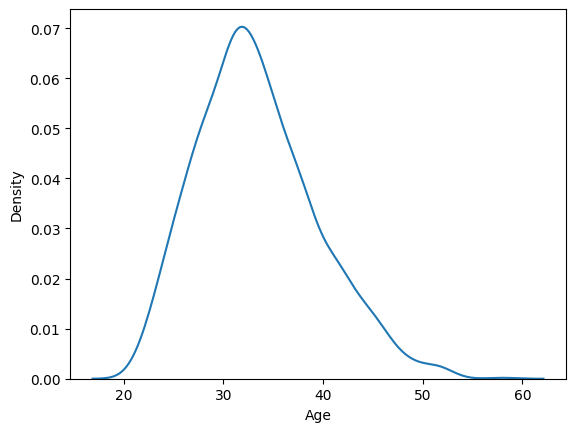

In [20]:
#Relation between age and churn rate
sns.kdeplot(x='Age',data=data[data['Target']==1])

([<matplotlib.axis.XTick at 0x77fc75562810>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

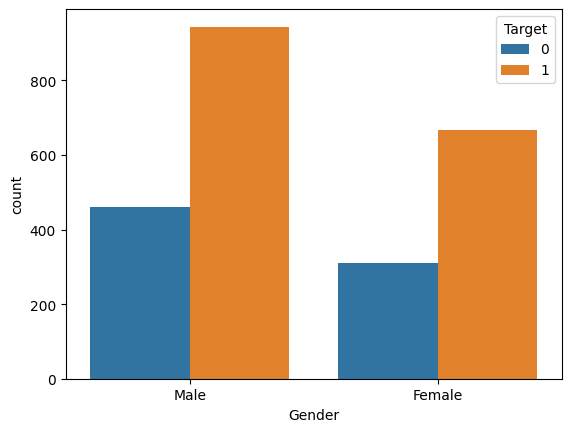

In [21]:
#gender and churn rate
sns.countplot(x='Gender',data=data,hue='Target')
plt.xticks([0,1],['Male','Female'])

<Axes: xlabel='Tenure', ylabel='Density'>

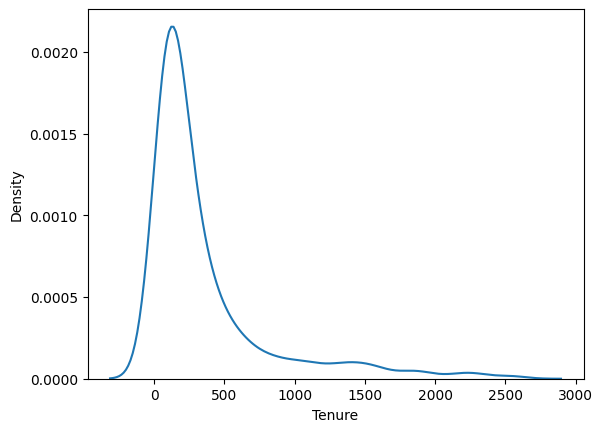

In [22]:
#ploting days of those who churned
sns.kdeplot(x='Tenure',data=data[data['Target']==1])

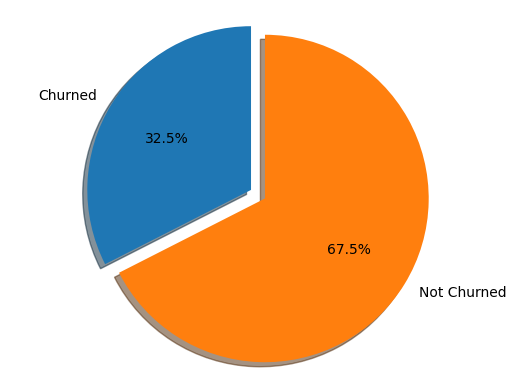

In [23]:
#pie chart showing total business value of those who churned and those who didnt
labels = ['Churned', 'Not Churned']
sizes = [data[data['Target']==1]['Total Business Value'].sum(), data[data['Target']==0]['Total Business Value'].sum()]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<Axes: >

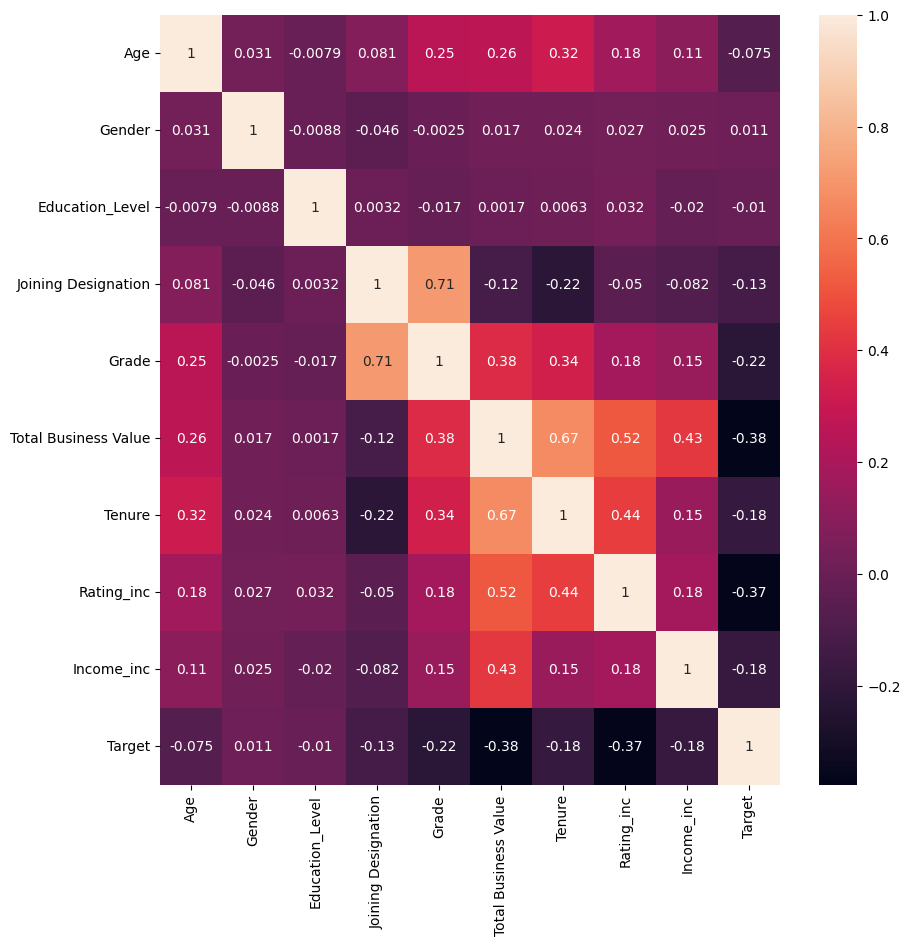

In [24]:
#correlation of several features with target
correl=data[['Age','Gender','Education_Level','Joining Designation','Grade','Total Business Value','Tenure','Rating_inc','Income_inc','Target']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correl,annot=True)


<Axes: xlabel='City', ylabel='count'>

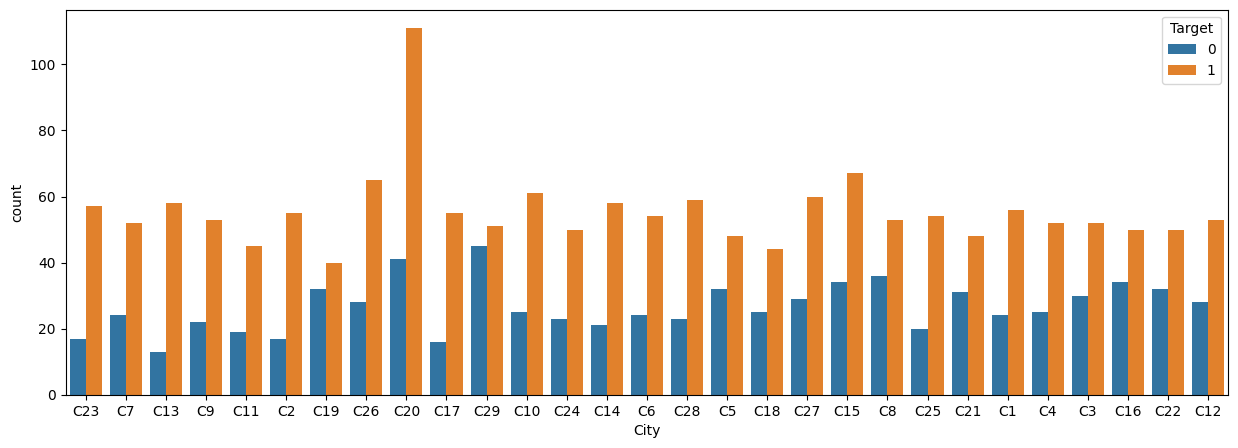

In [25]:
#grouping with city and finding the churn percentage
#visualisation
plt.figure(figsize=(15,5))
sns.countplot(x='City',data=data,hue='Target')

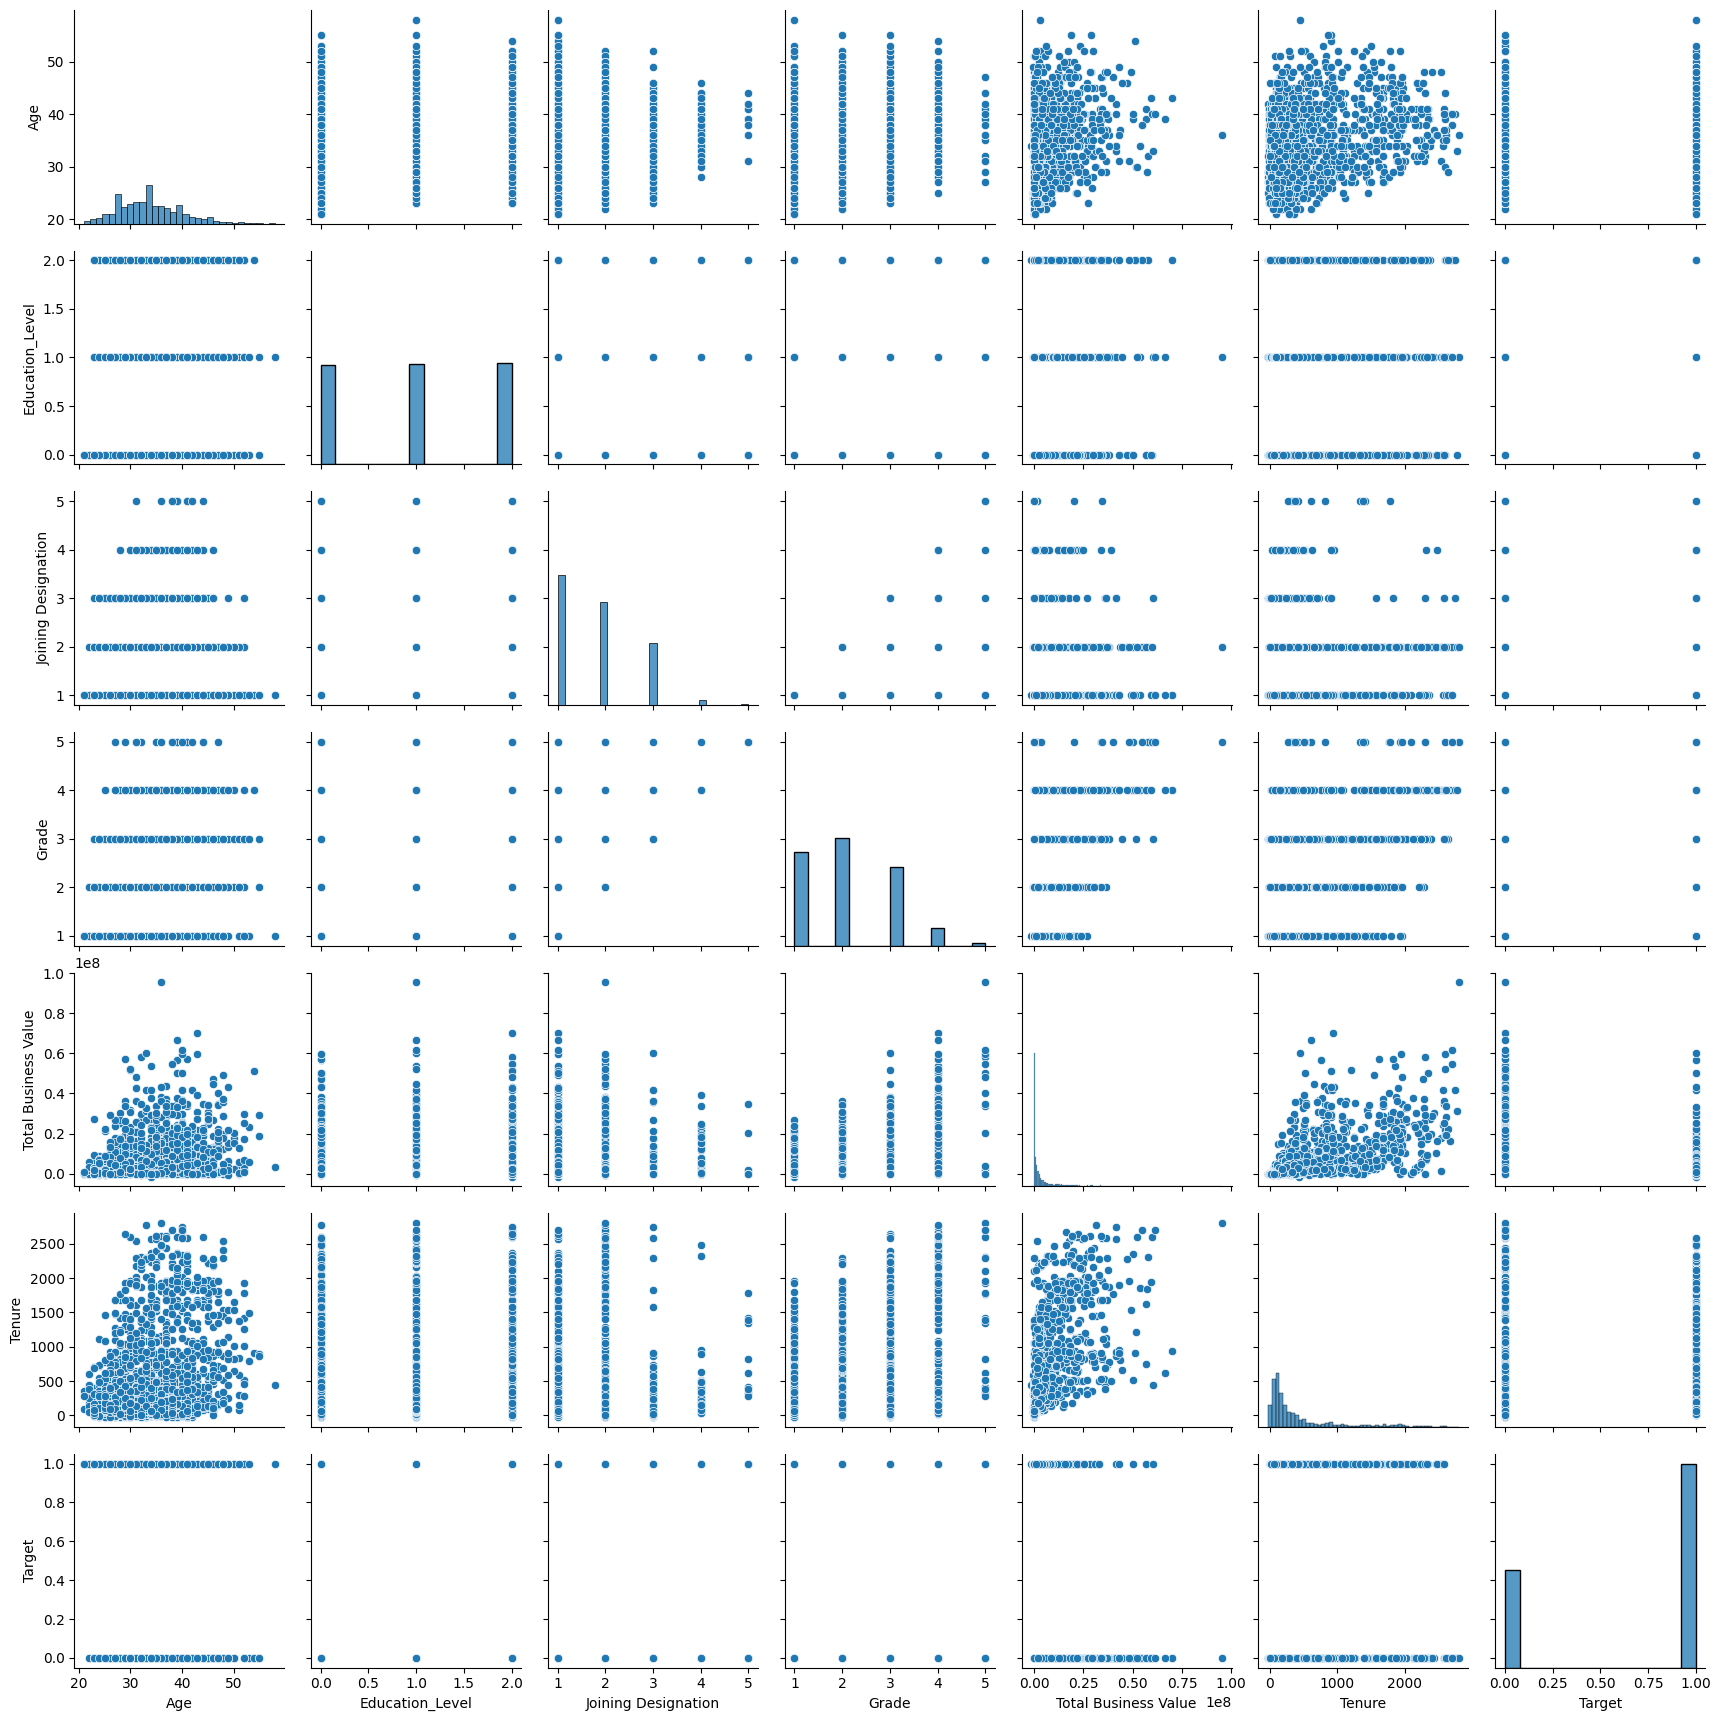

In [26]:
#pairplot of numerical columns
sns.pairplot(data[['Age','Education_Level','Joining Designation','Grade','Total Business Value','Tenure','Target']])

##EDA SUMMARY



> 1. The data contains driver assosiates details of ola from first January 2019 to 1st December 2020.
2. The data ensembles the details of 2381 driver associates.
3. The drivers are distributed over 29 cities.
4. Exploratory data analysis suggests that the age of drivers churned shows a right skewed distribution with maximum at about 32 years of age. Where the age of drivers range from 18 to 60.
5. The gender of drivers doesnt show visible difference in terms of churn percentage since for both genders the proportion of churned drivers are visibly same.
6. From the distribution of tenure of churned drivers, it can be infered that those who served for long are less likely to churn.
7. From analysisng the total business value, eventhough the number of churned drivers is more, the business value provided by them is only half of that by unchurned drivers.
8. By correlation Joining designation, Grade, Total Business value and whether Rating increased or not are found to be highly correlated to the churn of drivers.






##Data Preprocessing

###1.KNN Imputation

In [27]:
data.isna().sum()

,0
Driver_ID,0
Gender,0
City,0
Education_Level,0
Join_date,0
Joining Designation,0
Age,0
Report_Date,0
Grade,0
Total Business Value,0


Here the number of null values is found to be zero except for last date. For last date column, knn imputation cannot be used since it will alter the information. The steps for applying knn imputer is as follows.

In [28]:
#importing knn imputer
from sklearn.impute import KNNImputer
#imputing missing values in column 'column' in dataframe data
imputer = KNNImputer(n_neighbors=5)
'''data['column'] = imputer.fit_transform(data[['column']])'''

"data['column'] = imputer.fit_transform(data[['column']])"

###2.Feature Engineering

Here, the columns needed to add are
*   Target column for which ever driver whose last date is available
*   Columns describing if the drivers income has increased
*   Column describing if the drivers rating has increased
*   Tenure column showing how long a driver has been working with Ola

All these steps are completed before EDA.

The codes are as follows

1. Churn column - the driver who is having a last date is categorised to be churned.
data['Target']=np.where(data['Last_date'].isna(),0,1)

2. For driver income increase.

df['Income_inc'] = df['Income'].lt(df.groupby('Driver_ID')['Income'].shift(-1)).astype(int)

3. For driver rating increase.

df['Rating_inc'] = df['Quarterly Rating'].lt(df.groupby('Driver_ID')['Quarterly Rating'].shift(-1)).astype(int)

4. Adding tenure as a new column

data['Tenure'] = np.where(pd.isna(data['Last_date']), (max(data['Report_Date']) - data['Join_date']), (data['Last_date'] - data['Join_date']))

data['Tenure'] = data['Tenure'].dt.days.astype('int16')


In [29]:
#dropping the ID column and dates columns
data.drop(['Driver_ID','Report_Date','Join_date','Last_date'],axis=1,inplace=True)

In [30]:
data

,Gender,City,Education_Level,Joining Designation,Age,Grade,Total Business Value,Rating_inc,Income_inc,Target,Tenure
0,0.0,C23,2,1,28.0,1,1715580,0,0,1,77
1,0.0,C7,2,2,31.0,2,0,0,0,0,25
2,0.0,C13,2,2,43.0,2,350000,0,0,1,142
3,0.0,C9,0,1,29.0,1,120360,0,0,1,57
4,1.0,C11,1,3,31.0,3,1265000,1,0,0,123
...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,C24,0,2,34.0,3,21748820,1,0,0,1874
2377,1.0,C9,0,1,34.0,1,0,0,0,1,61
2378,0.0,C19,0,2,45.0,2,2815090,0,0,1,418
2379,1.0,C20,2,1,28.0,1,977830,0,0,1,334


###3.Standardisation

The columns Total Business Value , Tenure and Age are in different scales. They are standardised into standard normal distribution

In [31]:
#inporting standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
data[['Total Business Value','Tenure','Age']]=scaler.fit_transform(data[['Total Business Value','Tenure','Age']])
data

,Gender,City,Education_Level,Joining Designation,Age,Grade,Total Business Value,Rating_inc,Income_inc,Target,Tenure
0,0.0,C23,2,1,-0.946577,1,-0.314138,0,0,1,-0.621512
1,0.0,C7,2,2,-0.445101,2,-0.502295,0,0,0,-0.713557
2,0.0,C13,2,2,1.560803,2,-0.463909,0,0,1,-0.506457
3,0.0,C9,0,1,-0.779418,1,-0.489095,0,0,1,-0.656914
4,1.0,C11,1,3,-0.445101,3,-0.363556,1,0,0,-0.540088
...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,C24,0,2,0.056375,3,1.883017,1,0,0,2.559334
2377,1.0,C9,0,1,0.056375,1,-0.502295,0,0,1,-0.649834
2378,0.0,C19,0,2,1.895120,2,-0.193549,0,0,1,-0.017913
2379,1.0,C20,2,1,-0.946577,1,-0.395051,0,0,1,-0.166600


###4. Encoding

One hot encoding is used for categorical variables : City,Education level, Joining designation and grade.

In [34]:
#one hot encoding using pandas
data1=pd.get_dummies(data,columns=['City','Education_Level','Joining Designation','Grade'],dtype=int)
data1


,Gender,Age,Total Business Value,Rating_inc,Income_inc,Target,Tenure,City_C1,City_C10,City_C11,...,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,0.0,-0.946577,-0.314138,0,0,1,-0.621512,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.0,-0.445101,-0.502295,0,0,0,-0.713557,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.0,1.560803,-0.463909,0,0,1,-0.506457,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.0,-0.779418,-0.489095,0,0,1,-0.656914,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1.0,-0.445101,-0.363556,1,0,0,-0.540088,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.056375,1.883017,1,0,0,2.559334,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2377,1.0,0.056375,-0.502295,0,0,1,-0.649834,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2378,0.0,1.895120,-0.193549,0,0,1,-0.017913,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2379,1.0,-0.946577,-0.395051,0,0,1,-0.166600,0,0,0,...,1,0,0,0,0,1,0,0,0,0


###5. Class Imbalance Treatment

First the data is split into train and test data using train_test_split


In [35]:
#importing train test split
from sklearn.model_selection import train_test_split

In [36]:
X=data1.drop('Target',axis=1)
y=data1['Target']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [38]:
y_train.value_counts()

,count
Target,
1,1283
0,621


Here it can be clearly understood that there is imbalance in the data. For treating the imbalance, SMOTE can be used.

In [39]:
#importing SMOTE
from imblearn.over_sampling import SMOTE

In [40]:
smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)

In [41]:
y_train.value_counts()

,count
Target,
1,1283
0,1283


##Model building

###1 Ensemble - Bagging Algorithm

Random Forest classifier is a bagging algorithm which can be used for the above dataset.


In [42]:
#importing Random FOrest Classifier
from sklearn.ensemble import RandomForestClassifier

GridSearch is used to find the best parameters

In [44]:
paramsRF = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [5,10,15],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [10,15,20]
         }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = paramsRF,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 15, 'n_estimators': 200}
Best score:  0.8367159461478203


In [52]:
#training the model with best parameters
RFC=RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 15, max_features= 15, n_estimators= 200)
RFC.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=15,
                       n_estimators=200)

In [61]:
#ACCURACY SCORE
print("Train accuracy: {:.2f}".format(RFC.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(RFC.score(X_test, y_test)*100))

Train accuracy: 98.09
Test accuracy: 83.86


###1 Ensemble - Boosting Algorithm

Gradient Boosting Desicion Tree algorithm (GBDT) is used.

In [48]:
paramsGB = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [5, 6,7,8],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [50]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV


gbc = GBC()
rndm = RandomizedSearchCV(gbc, paramsGB, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)
rndm.fit(X_train, y_train)

print("Best params: ", rndm.best_params_)
print("Best score: ", rndm.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params:  {'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 6, 'learning_rate': 0.1}
Best score:  0.8332130950429032


In [53]:
#Training a model using best parameters
GBDT=GBC(learning_rate= 0.1, max_depth= 6, max_leaf_nodes= 80, n_estimators= 50)
GBDT.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, max_leaf_nodes=80, n_estimators=50)

In [59]:
#Accuracy Score

print("Train accuracy: {:.2f}".format(GBDT.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(GBDT.score(X_test, y_test)*100))

Train accuracy: 92.75
Test accuracy: 81.34


##4.Results Evaluation

###ROC AUC Curve & comments

In [54]:
#importing ROC AUC curve
from sklearn.metrics import roc_curve, roc_auc_score

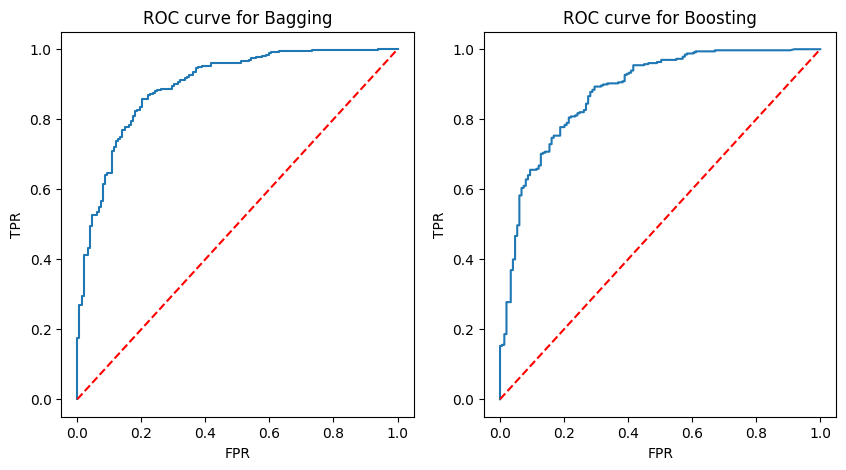

In [56]:
#ROC_AUC CURVES
plt.figure(figsize=(10,5))
prob1 = RFC.predict_proba(X_test)
prob2 = GBDT.predict_proba(X_test)

probabilites = prob1[:,1]

fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.subplot(1,2,1)
plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve for Bagging')
plt.xlabel('FPR')
plt.ylabel('TPR')

probabilites = prob2[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.subplot(1,2,2)
plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve for Boosting')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()


###Classification Report

###Confusion Matrix for Bagging

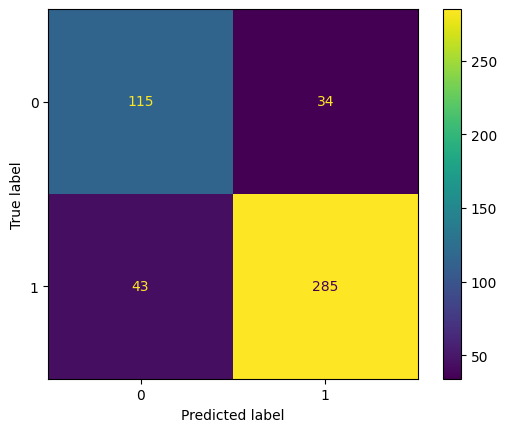

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = RFC.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()


###Confusion Martrix for Boosting

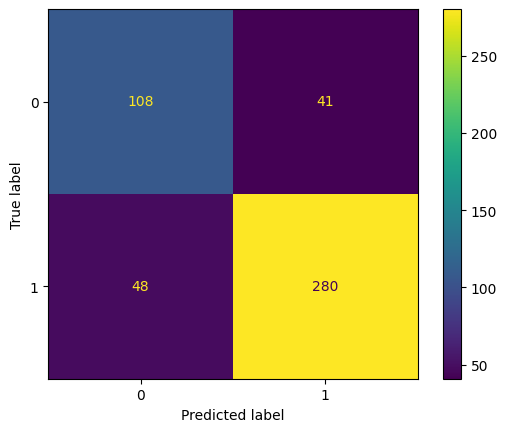

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = GBDT.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()



> 1. The ROC-AUC curve of bagging and boosting techniques are plotted
2.   The ROC curve of Bagging technique (Random FOrest Classifier) shows more proximity to the ideal curve.
3. The confusion matrix also shows less number of false predictions for Random FOrest Classifier than Gradient Boosted DT.





In [67]:
#feature importance from the models
feature_names = X.columns
importances=RFC.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df.head(5))

                Feature  Gini Importance
5                Tenure         0.265959
2  Total Business Value         0.232362
1                   Age         0.105332
3            Rating_inc         0.073557
0                Gender         0.022436


In [68]:
importances=GBDT.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df.head(5))

                  Feature  Gini Importance
2    Total Business Value         0.333425
5                  Tenure         0.317063
3              Rating_inc         0.084166
1                     Age         0.062712
40  Joining Designation_3         0.052897


##5. Actionable Insights & Recommendations




> 1. The bagging as well as boosting algorithms have performed well with a good resting accuracy.
2. These models could be used to predict the churn of drivers in a future percpective.
1. Promotional offers like reduction in commission rate etc could be provided to the drivers to prevent them from leaving.
3. From the feature importance, **Tenure, Total Business value, Rating increment, and Age** are found to be most important is deciding the churn rate of drivers from Ola.
5. Drivers could be classified based on the above matrices to coin targeted promotional features which will help bring down the churn rate.





---

